# KL Annealing

There are different KL annealing schedules. It describes the scheduling of the $\beta$ value of the KL-divergence part in the loss function of a variational autoencoder (VAE).

Some common schedulings:
- no scheduling at all, $\beta=1$ all the time
- linear scheduling
- sigmoid scheduling
- cyclical scheduling 

There are papers, which show how using different KL-annealing schedules can improve the representation of the input data $X$ in the latent space $Z$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

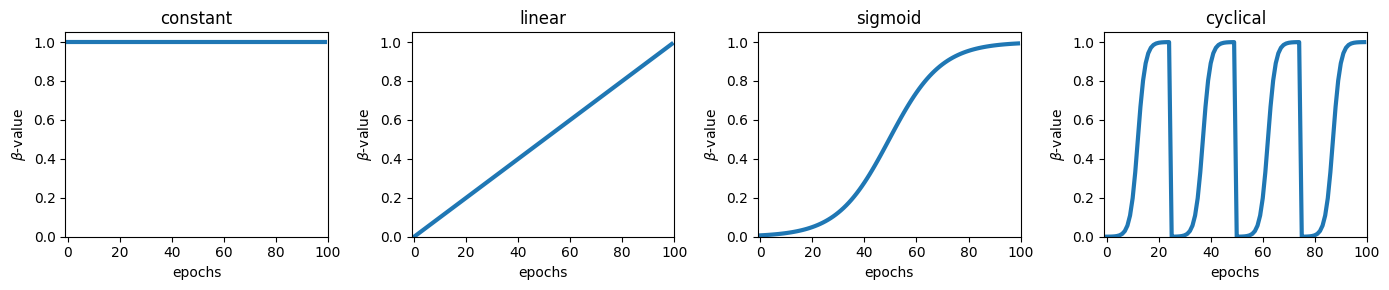

In [76]:
max_epochs = 100
epochs = np.arange(max_epochs * 1)

# constant scheduling
constant = epochs * 0 + 1
# linear scheduling
linear = 1/max_epochs * epochs
# sigmoid scheduling
annealing_rate = 0.1
# sigmoid = (1 - 0.94 ** epochs)
sigmoid = (1 / (1 + np.exp(- annealing_rate * (epochs-epochs.mean())))) 
# cyclical sigmoid
annealing_rate = 0.7
cycles = 4
T = max_epochs // cycles
cyclical = np.arange(T)
cyclical = (1 / (1 + np.exp(- annealing_rate * (cyclical-cyclical.mean()))))
cyclical = np.concatenate((cyclical,)*cycles)
cyclical = np.concatenate((cyclical, cyclical[:max_epochs%cycles]))


# visualize
schedules = [constant, linear, sigmoid, cyclical]
names = ['constant', 'linear', 'sigmoid', 'cyclical']
fig = plt.figure(figsize=(14, 3))
for i, (schedule, name) in enumerate(zip(schedules, names)):
    ax = fig.add_subplot(1,4,i+1)
    plt.plot(epochs, schedule, lw=3)
    ax.set(xlim=(-1,100), ylim=(0,1.05), xlabel='epochs', ylabel=r'$\beta$-value')
    plt.title(name)
fig.tight_layout()
fig.show()

In [211]:
def kl_annealing_cyclical(cycles, step, kl_start, kl_end):
    end = kl_end - kl_start
    T = end // cycles
    if T < 44:
        print('Warning! Number of epochs is too low, for the number of cycles in KL-annealing.')
    print(T)
    new_step = step % T
    annealing_rate = 0.7 * (2**(-T/25 +1)) * 2 # figured out experimentally, 0.7 anneal rate, for T = 50
    annealing_rate = 0.7 * (np.exp(-T/25 +1)) # figured out experimentally, 0.7 anneal rate, for T = 50
    f0 = (1 / (1 + np.exp(- 50)))
    f_new = (1 / (1 + np.exp(- T)))
    annealing_rate = 0.7 * f0 / f_new
    annealing_rate = 0.7 * 24/T
    print(24/T)
    # annealing_rate = 0.35
    kl_weight = (1 / (1 + np.exp(- annealing_rate * (new_step - T*0.5))))
    return kl_weight


10
2.4


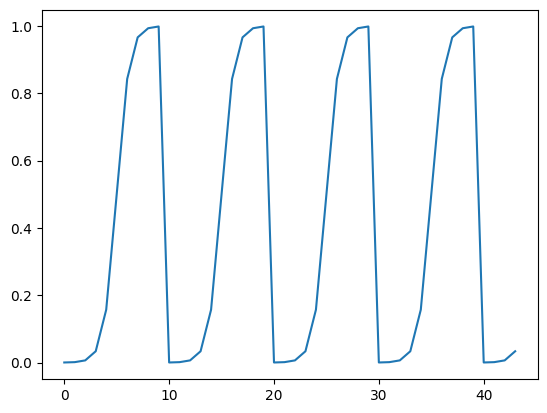

In [219]:
max_epochs = 44
epochs = np.arange(max_epochs)
schedule = kl_annealing_cyclical(4, epochs, epochs.min(), epochs.max())

fig = plt.figure()
plt.plot(epochs, schedule)
fig.show()